**Business Problem Understanding - 

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

**Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

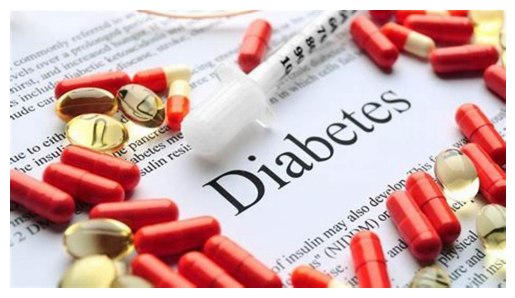

In [2]:
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('OIP.jpeg')

# Display the image

plt.imshow(img)
plt.axis('off')    # Hide the axes
plt.show()

**Load Dataset & Observe Each And Every Column

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.shape

(100000, 9)

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

**Data Understanding

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.duplicated().sum()

3854

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [12]:
df['gender'].nunique()

3

In [13]:
df['age'].value_counts()

age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [14]:
df['age'].nunique()

102

In [15]:
df['hypertension'].value_counts()

hypertension
0    88685
1     7461
Name: count, dtype: int64

In [16]:
df['hypertension'].nunique()

2

In [17]:
df['heart_disease'].value_counts()

heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [18]:
df['heart_disease'].nunique()

2

In [19]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [20]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [21]:
df['smoking_history'].nunique()

6

In [22]:
df['bmi'].value_counts()

bmi
27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

In [23]:
df['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

In [24]:
df['bmi'].nunique()

4247

In [25]:
df['HbA1c_level'].value_counts()

HbA1c_level
6.6    8164
5.7    8124
6.5    8051
5.8    7992
6.0    7988
6.2    7958
6.1    7716
3.5    7319
4.8    7296
4.5    7290
4.0    7205
5.0    7155
8.8     660
8.2     659
9.0     652
7.5     642
6.8     642
7.0     633
Name: count, dtype: int64

In [26]:
df['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [27]:
df['HbA1c_level'].nunique()

18

In [28]:
df['blood_glucose_level'].value_counts()

blood_glucose_level
159    7478
130    7471
126    7421
140    7416
160    7397
145    7371
200    7290
155    7285
90     6822
80     6786
100    6774
158    6739
85     6632
280     724
300     673
260     634
240     633
220     600
Name: count, dtype: int64

In [29]:
df['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [30]:
df['blood_glucose_level'].nunique()

18

In [31]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [32]:
continous            = ['age','bmi','HbA1c_level','blood_glucose_level']

DiscreteCategorical = ['gender','smoking_history']


In [33]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**Exploratory Data Analysis

In [34]:
df[continous].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [35]:
df[continous].skew()

age                   -0.062445
bmi                    1.023751
HbA1c_level           -0.054463
blood_glucose_level    0.836489
dtype: float64

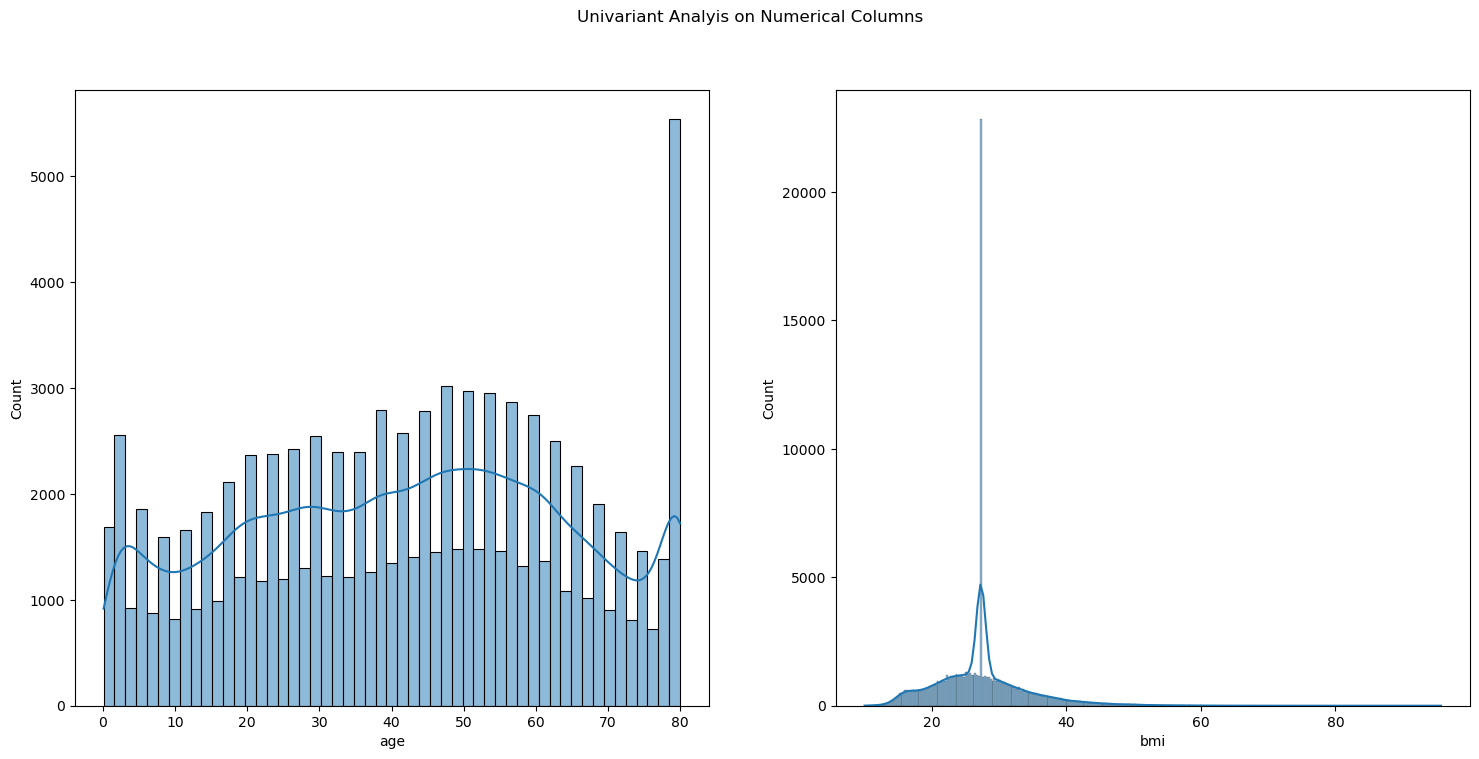

In [36]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['age'],kde = True)

plt.subplot(1,2,2)
sns.histplot(df['bmi'],kde = True)

plt.suptitle('Univariant Analyis on Numerical Columns')
plt.show()
           

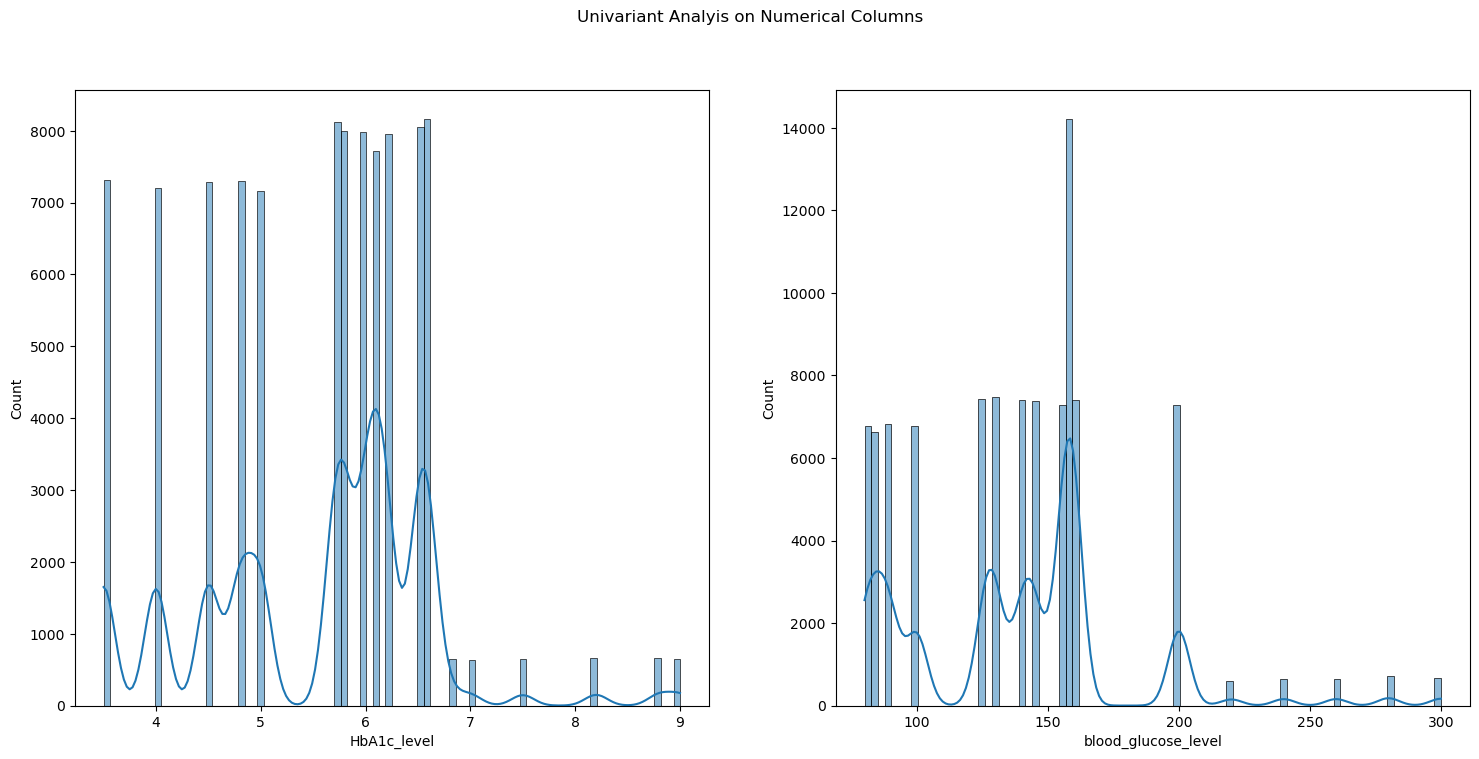

In [37]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['HbA1c_level'],kde = True)

plt.subplot(1,2,2)
sns.histplot(df['blood_glucose_level'],kde = True)

plt.suptitle('Univariant Analyis on Numerical Columns')
plt.show()

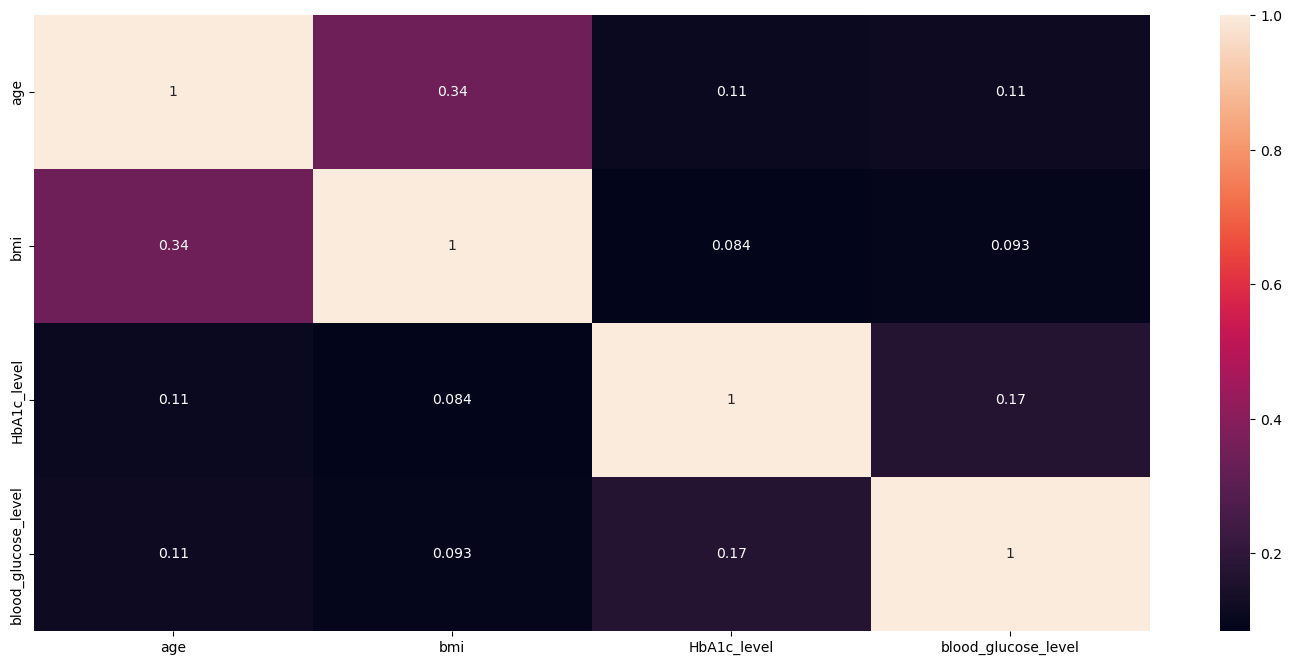

In [38]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

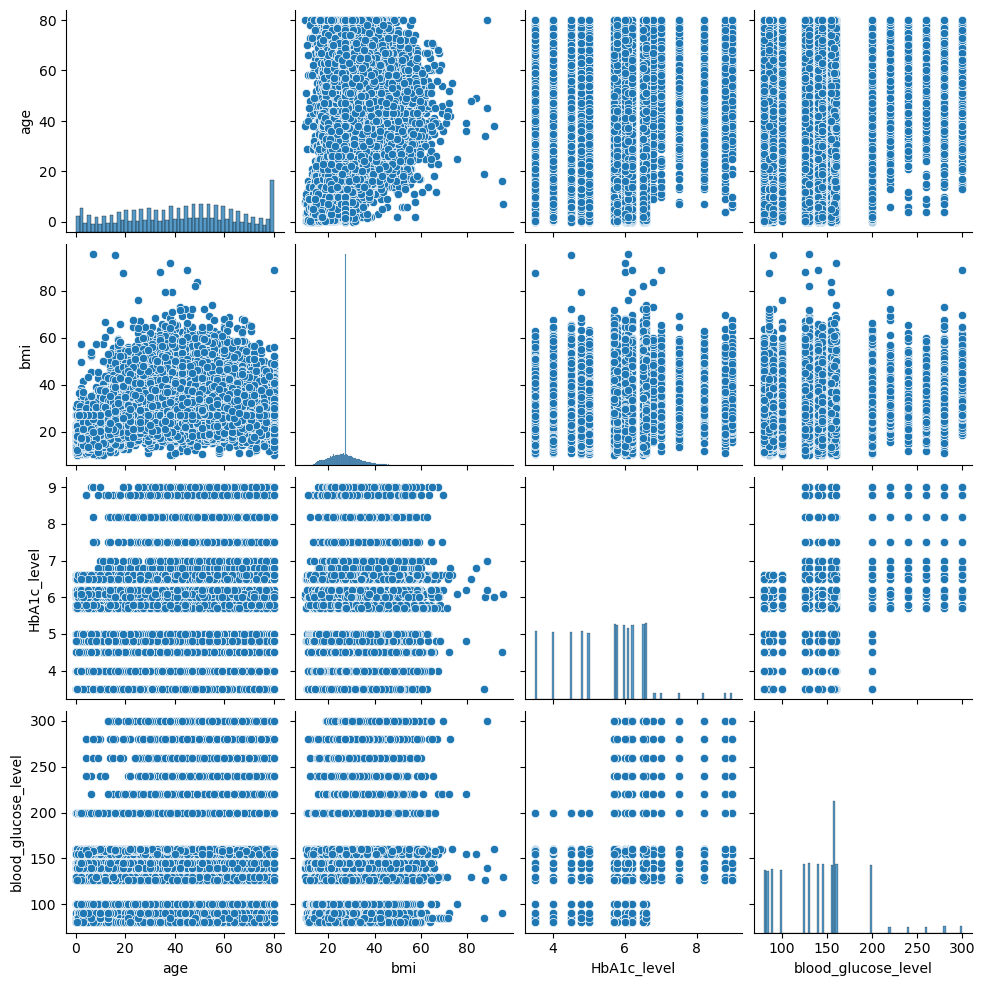

In [39]:
sns.pairplot(df[continous])
plt.show()

In [40]:
df[DiscreteCategorical].describe()

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


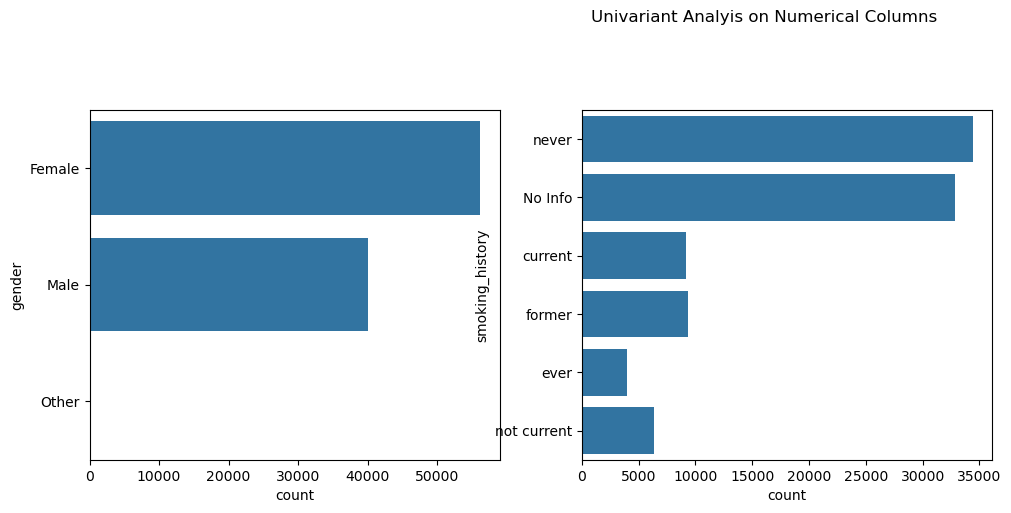

In [41]:
plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(2,3,1)
sns.countplot(df['gender'])

plt.subplot(2,3,2)
sns.countplot(df['smoking_history'])

plt.suptitle ('Univariant Analyis on Numerical Columns')
plt.show()

In [42]:
# Lets compare all the Categories with respect to undersatnd whom will be effected with diabetes

print("Impact of smoking_history on diabetes")
print(pd.crosstab(df['diabetes'], df['smoking_history']))
print('\n')

print("Impact of heart_disease on Loan Status")
print(pd.crosstab(df['diabetes'], df['heart_disease']))
print('\n')

print("Impact of hypertension on Loan Status")
print(pd.crosstab(df['diabetes'], df['hypertension']))
print('\n')

Impact of smoking_history on diabetes
smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  31442     8249  3526    7709  31061         5677
1                   1445      948   472    1590   3337          690


Impact of heart_disease on Loan Status
heart_disease      0     1
diabetes                  
0              85008  2656
1               7215  1267


Impact of hypertension on Loan Status
hypertension      0     1
diabetes                 
0             82289  5375
1              6396  2086




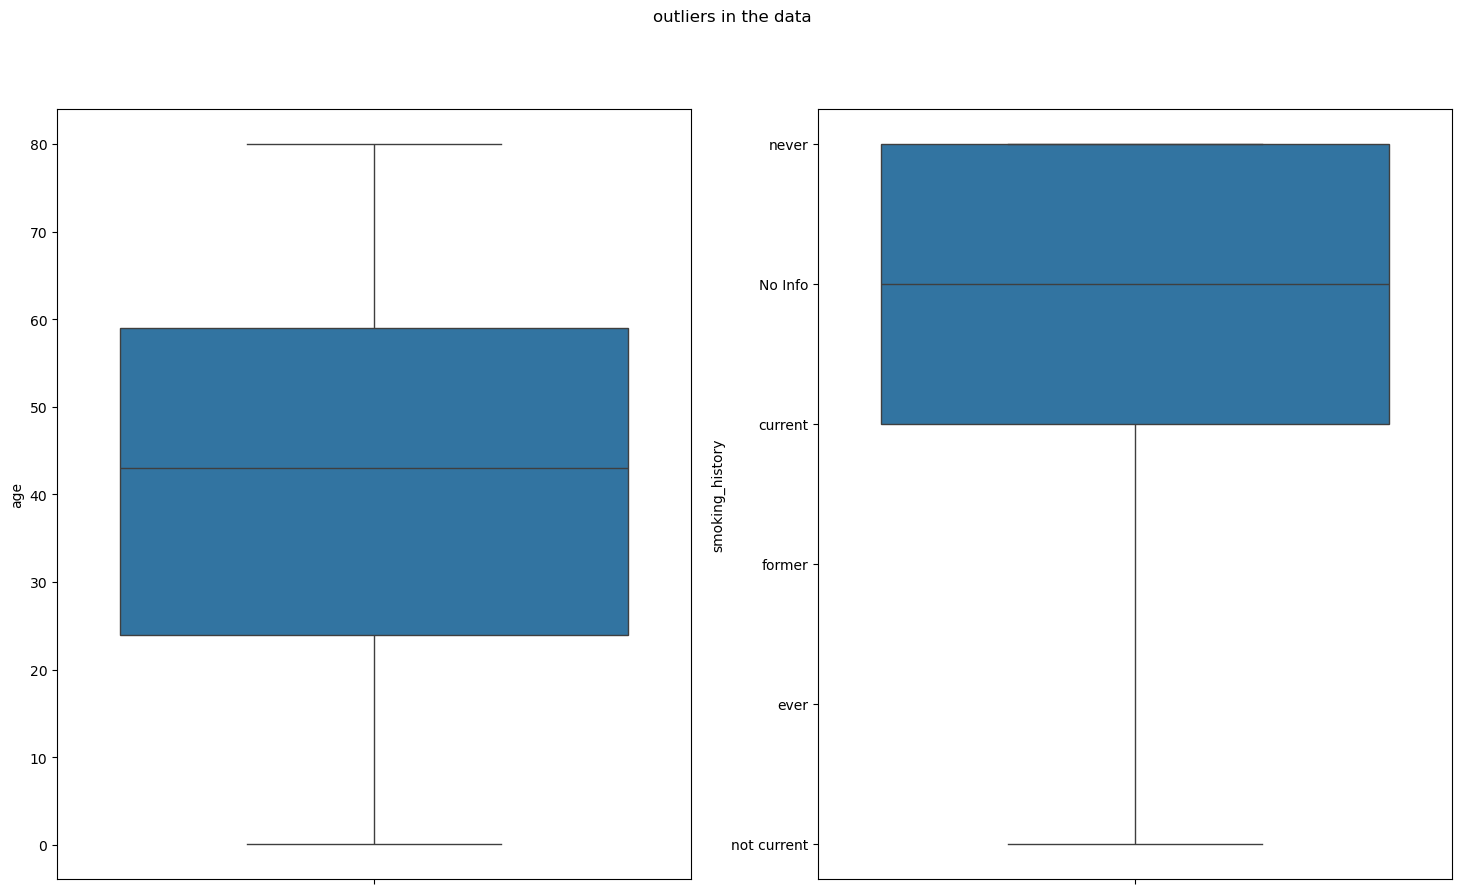

In [43]:
#let visualize the outliers using boxplot

plt.subplot(1,2,1)
sns.boxplot(df['age'])


plt.subplot(1,2,2)
sns.boxplot(df['smoking_history'])

plt.suptitle('outliers in the data')
plt.show()

<Figure size 1200x1000 with 0 Axes>

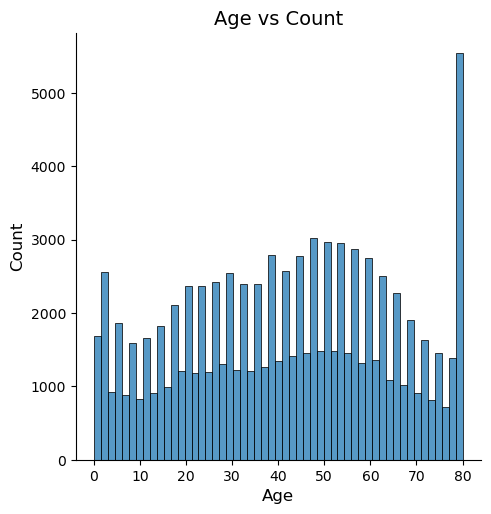

In [44]:
# Age vs Count

plt.figure(figsize=(12,10))
sns.displot(df['age'])
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Age vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

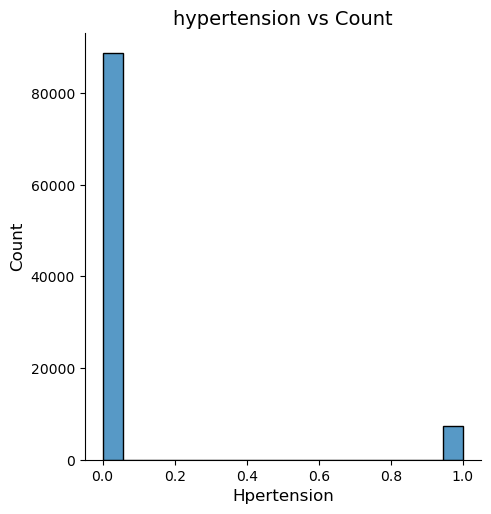

In [45]:
#hypertension  vs Count

plt.figure(figsize=(12,10))
sns.displot(df['hypertension'])
plt.xlabel('Hpertension',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('hypertension vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

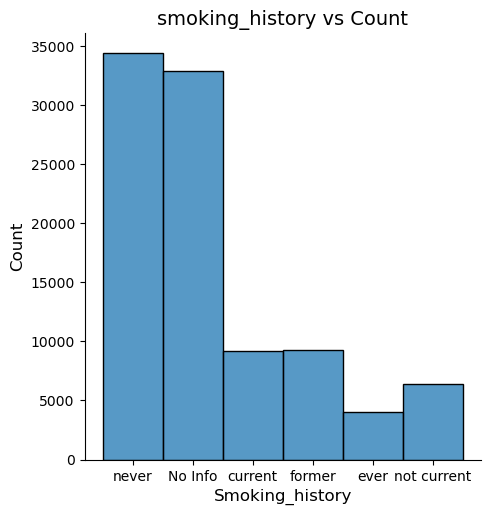

In [46]:
#smoking_history  vs Count

plt.figure(figsize=(12,10))
sns.displot(df['smoking_history'])
plt.xlabel('Smoking_history',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('smoking_history vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

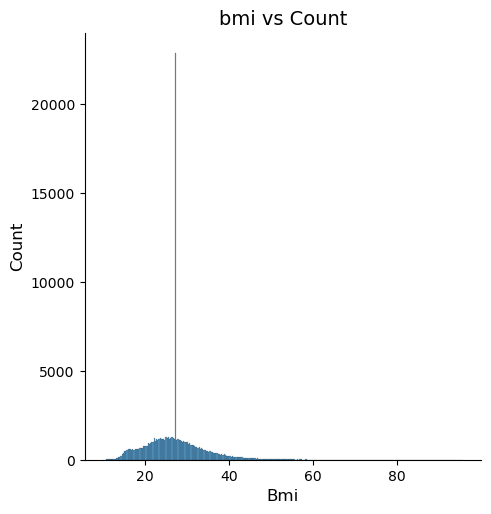

In [47]:
#bmi  vs Count

plt.figure(figsize=(12,10))
sns.displot(df['bmi'])
plt.xlabel('Bmi',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('bmi vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

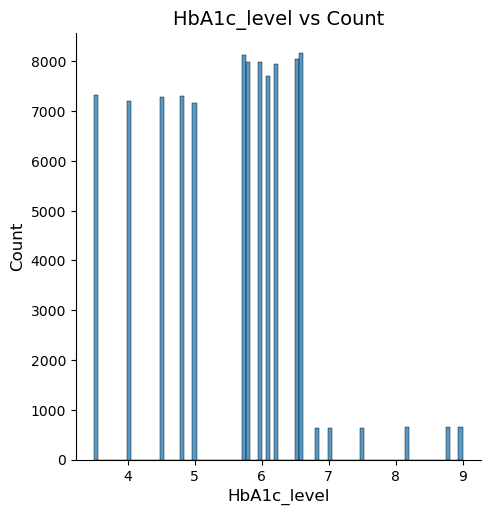

In [48]:
#HbA1c_level vs Count

plt.figure(figsize=(12,10))
sns.displot(df['HbA1c_level'])
plt.xlabel('HbA1c_level',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('HbA1c_level vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

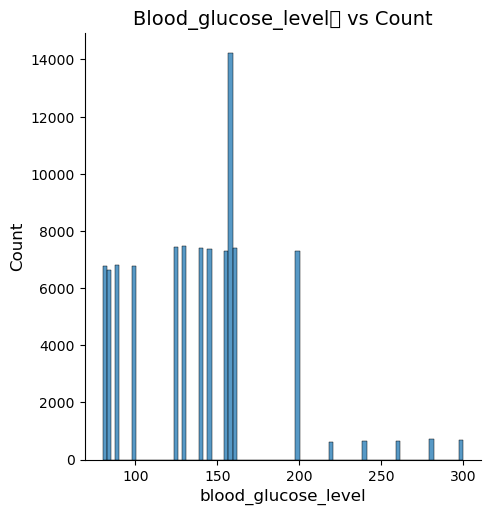

In [49]:
#blood_glucose_level vs Count

plt.figure(figsize=(12,10))
sns.displot(df['blood_glucose_level'])
plt.xlabel('blood_glucose_level',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Blood_glucose_level	 vs Count' ,fontsize=14)
plt.show()

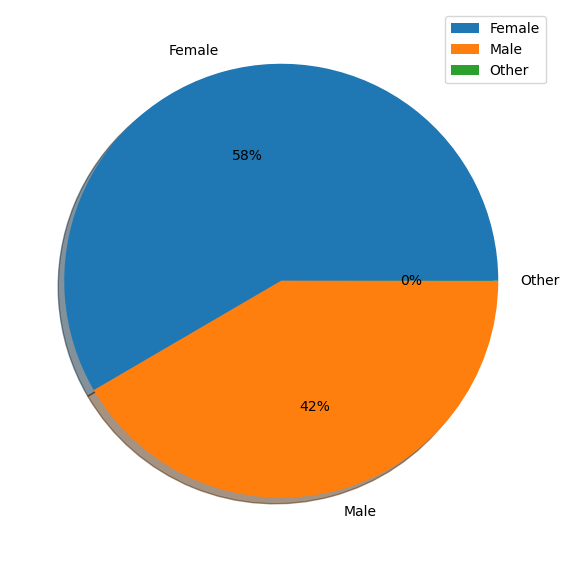

In [50]:
# Count values of gender

gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 9))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.0f%%', explode=[0.0]*len(gender_counts), shadow=True)
plt.legend()
plt.show()


<Figure size 1200x1000 with 0 Axes>

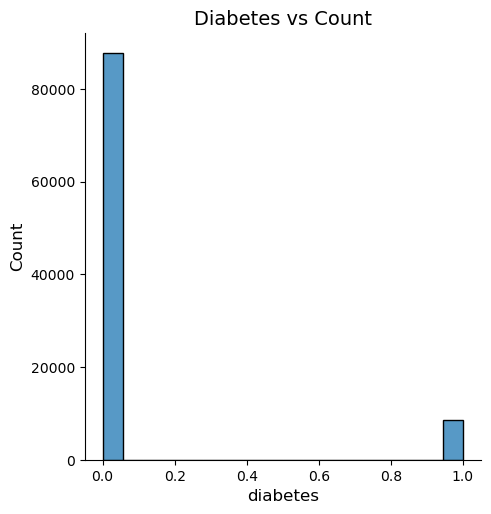

In [51]:
#blood_glucose_level vs Count

plt.figure(figsize=(12,10))
sns.displot(df['diabetes'])
plt.xlabel('diabetes',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Diabetes vs Count' ,fontsize=14)
plt.show()

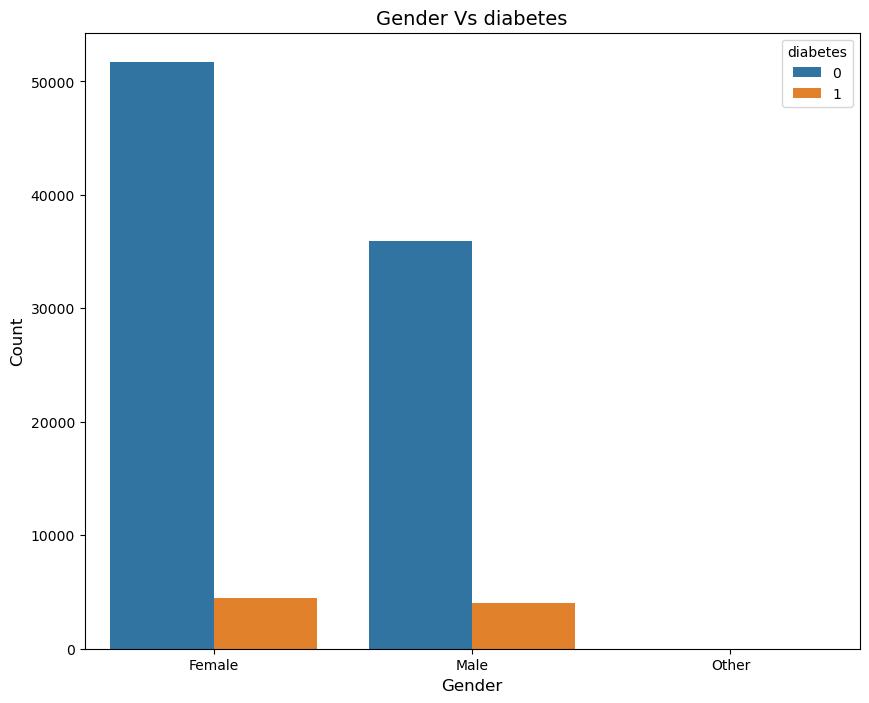

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['gender'],hue=df['diabetes'])
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Gender Vs diabetes',fontsize=14)
plt.show()

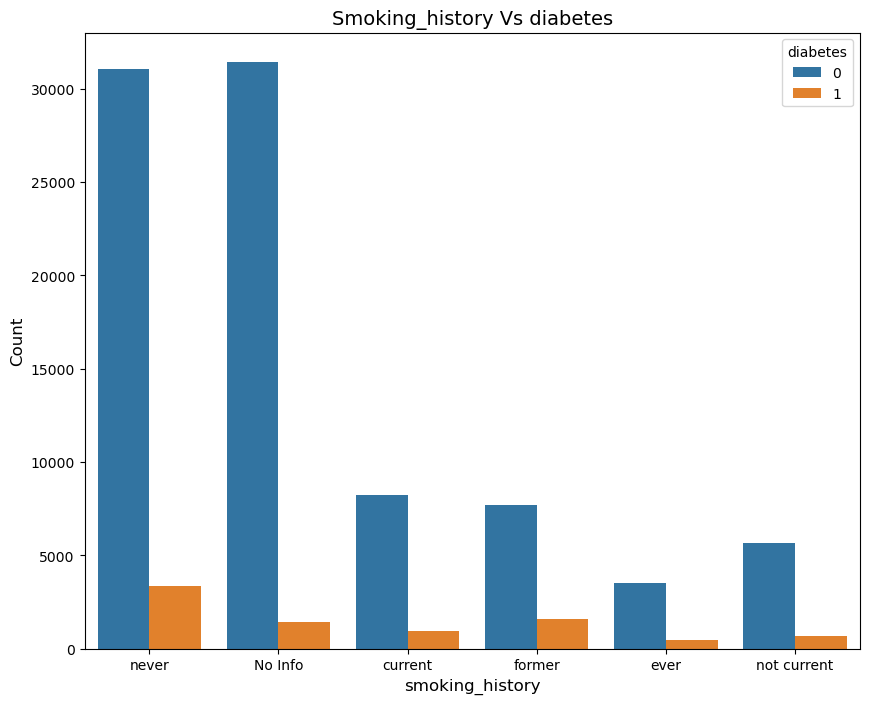

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['smoking_history'],hue=df['diabetes'])
plt.xlabel('smoking_history',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Smoking_history Vs diabetes',fontsize=14)
plt.show()

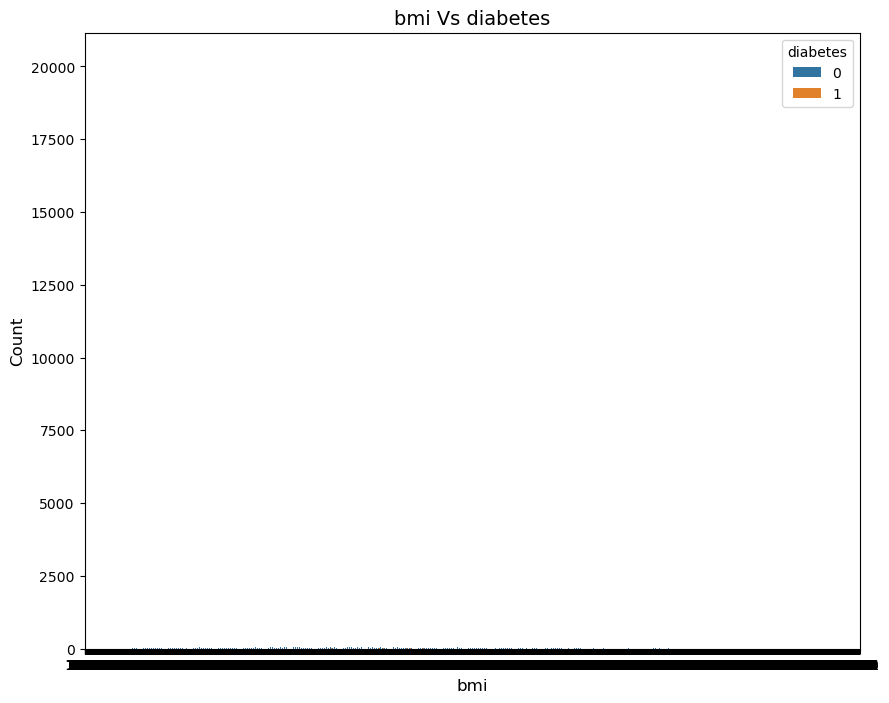

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['bmi'],hue=df['diabetes'])
plt.xlabel('bmi',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('bmi Vs diabetes',fontsize=14)
plt.show()

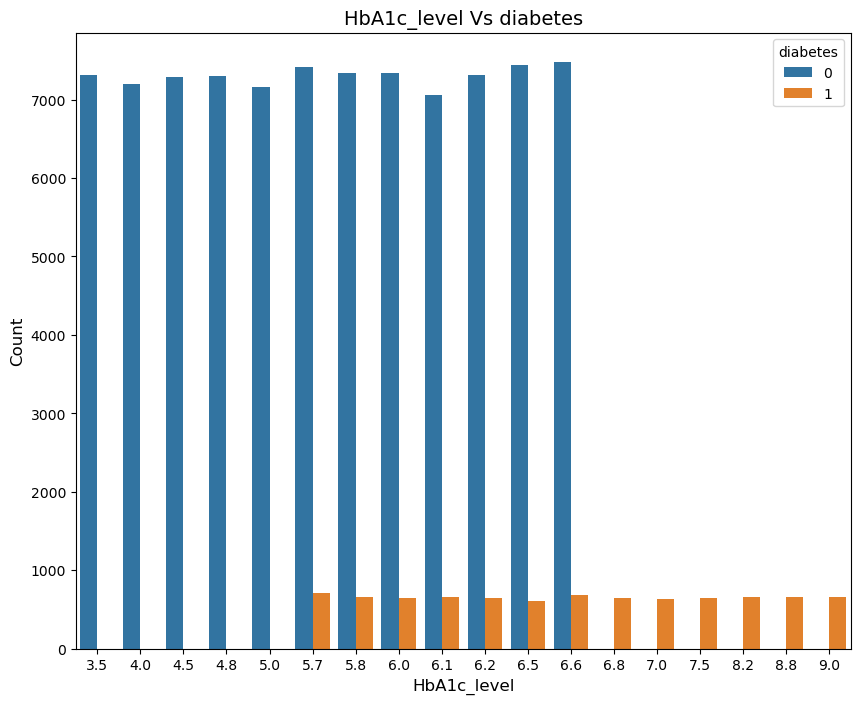

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['HbA1c_level'],hue=df['diabetes'])
plt.xlabel('HbA1c_level',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('HbA1c_level Vs diabetes',fontsize=14)
plt.show()

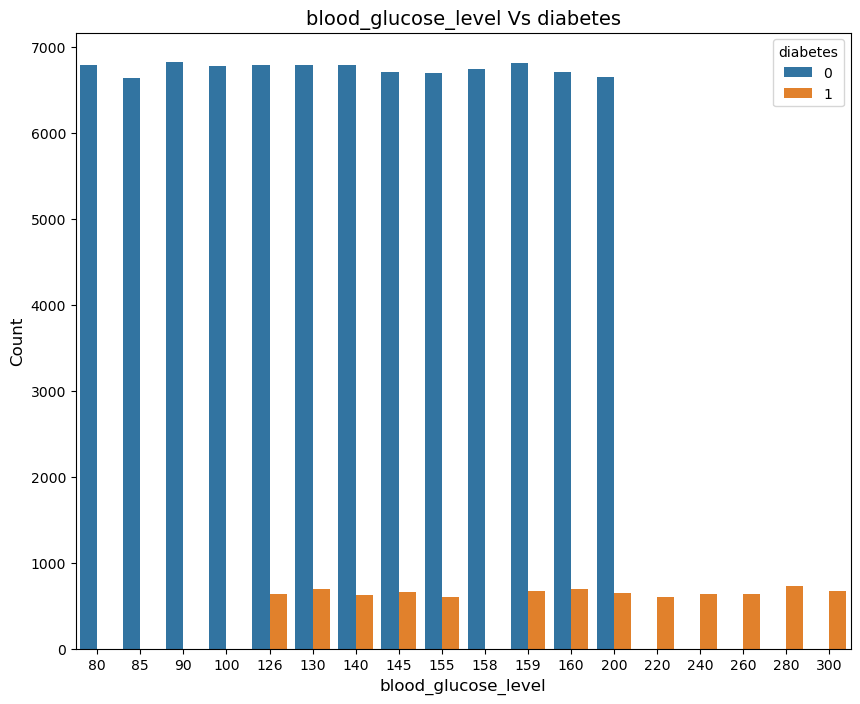

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['blood_glucose_level'],hue=df['diabetes'])
plt.xlabel('blood_glucose_level',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('blood_glucose_level Vs diabetes',fontsize=14)
plt.show()

**3-Data Preprocessing

1-Data cleaning -wrong data -missing values -wrong data types -duplicates -outliers

2-Data wrangling -transformation ('applicable on continous') -scaling ('applicable on continous') -encoding ('applicable on discrete categorical')

**dont apply data wrangling on discrete count

**Wrong data treatment

**data type conversion

**Encoding

In [57]:
# Map gender values to integers
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Check the updated DataFrame
print(df['gender'].head())

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: gender, dtype: float64


In [58]:
X&y

In [59]:
X= df.drop('diabetes' ,axis=1)
y = df['diabetes']

**Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =7)

In [65]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Identify numeric and non-numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns

# Replace non-numeric strings in X_train (e.g., 'No Info', 'never', etc.) with NaN
X_train.replace(['No Info', 'never', 'current'], np.nan, inplace=True)

# Handle numeric columns: fill missing values with the median of the training data
X_train[numeric_columns] = X_train[numeric_columns].fillna(X_train[numeric_columns].median())

# Handle non-numeric columns: fill missing values with mode
for column in non_numeric_columns:
    # Fill missing values in non-numeric columns using the mode from training data
    X_train[column] = X_train[column].fillna(X_train[column].mode()[0])
    
    # Ensure the column contains all strings before encoding
    X_train[column] = X_train[column].astype(str)
    
    # Apply label encoding
    X_train[column] = LabelEncoder().fit_transform(X_train[column])

# Define the logistic regression model
log_model = LogisticRegression()

# Fit the model on the preprocessed training data
log_model.fit(X_train, y_train)

# Similarly preprocess X_test
X_test.replace(['No Info', 'never', 'current'], np.nan, inplace=True)
X_test[numeric_columns] = X_test[numeric_columns].fillna(X_train[numeric_columns].median())

for column in non_numeric_columns:
    X_test[column] = X_test[column].fillna(X_train[column].mode()[0])
    X_test[column] = X_test[column].astype(str)
    X_test[column] = LabelEncoder().fit_transform(X_test[column])

# Now predict on the cleaned test data
ypred_test = log_model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, ypred_test))


Test Accuracy: 0.9538741549661987


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [67]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train) #default threshould value is 0.5
print('Train Accuracy :',accuracy_score(y_train,ypred_train))

print('CV score :',cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

ypred_test = log_model.predict(X_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9561859691091581
CV score : 0.9571740736755519
Test Accuracy: 0.9538741549661987


In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[17331   176]
 [  711  1012]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17507
           1       0.85      0.59      0.70      1723

    accuracy                           0.95     19230
   macro avg       0.91      0.79      0.84     19230
weighted avg       0.95      0.95      0.95     19230



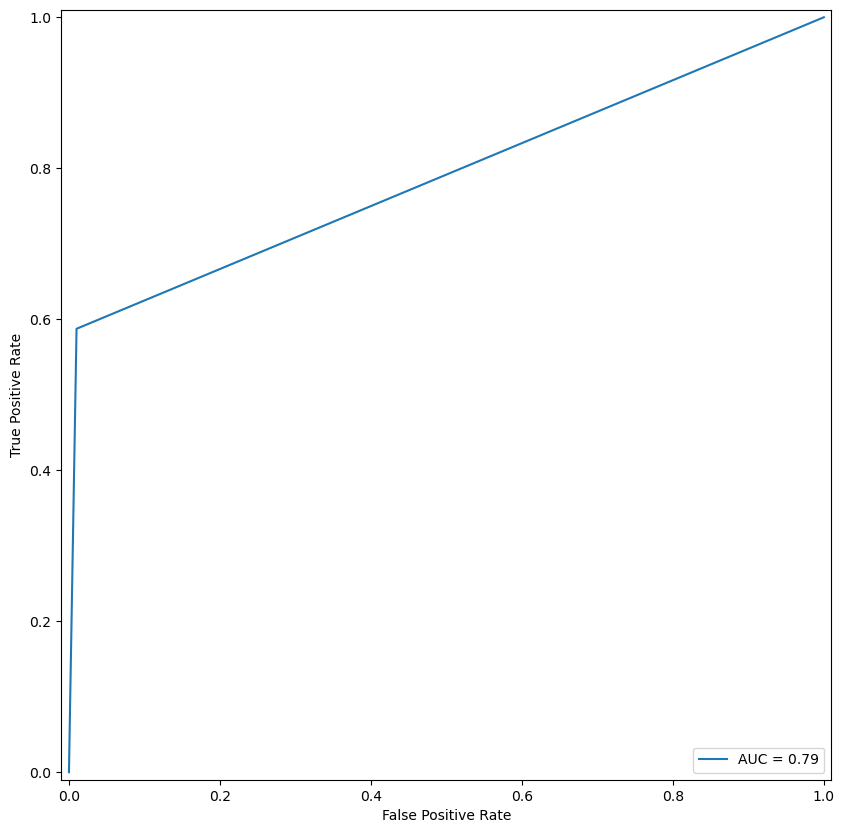

In [69]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt. show()

In [70]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test,ypred_test))

AUC Score: 0.7886472639200682


In [ ]:
**Decision Tree Classifier

-HPT -Identify important features by using feature selection (ensemble method) -Modelling & Evaluation

In [71]:
model = DecisionTreeClassifier (random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

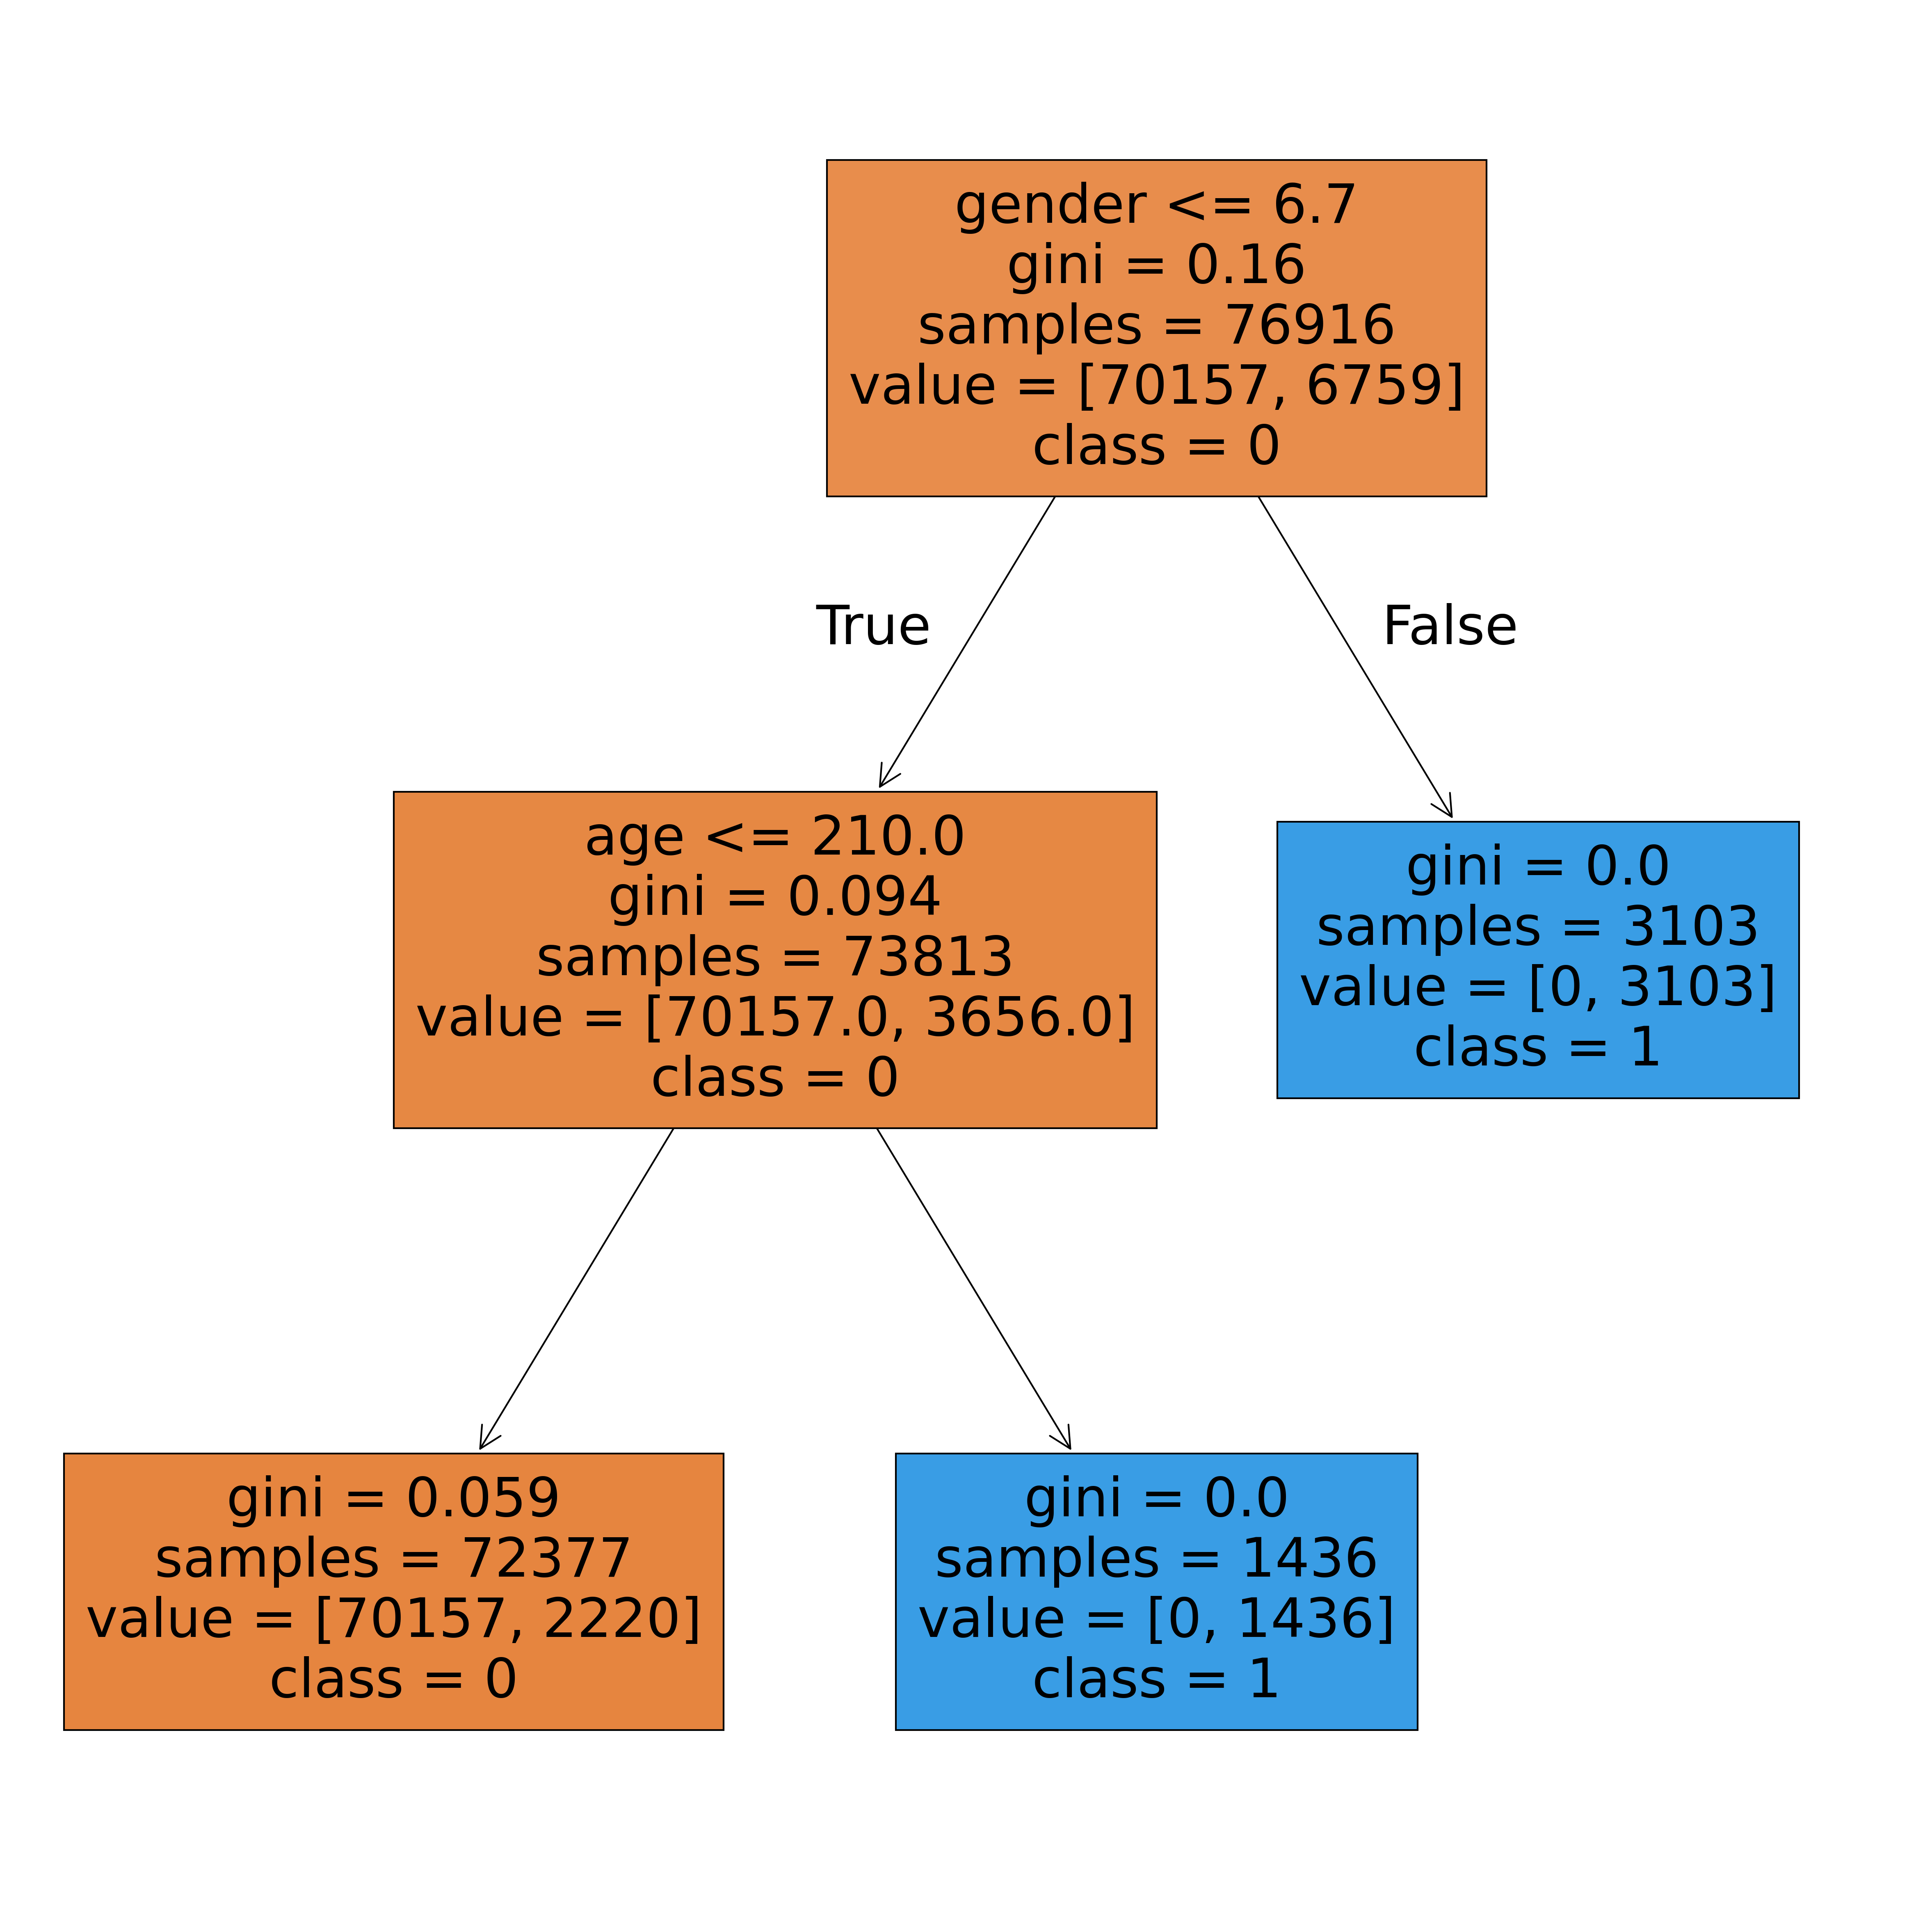

In [78]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dt, filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [73]:
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {"criterion": ["gini", "entropy"],
             "max_depth": list(range (1,16) )}
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid. fit(X_train,y_train)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=2, random_state=True)

In [74]:
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                  index=X.columns, 
                columns=[ 'Importance'])
important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['HbA1c_level', 'blood_glucose_level']

In [75]:
#Creating Decison Tree Model with important parameters and important features

#Selecting train & test data

X_train_dt = X_train[important_features_dt]
X_test_dt = X_test [important_features_dt]

#ModeLLing

dt = dt_grid.best_estimator_
dt. fit(X_train_dt,y_train)
#evaLuatzon
ypred_train = dt.predict(X_train_dt)
ypred_test= dt.predict(X_test_dt)
print ("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(dt,X_train_dt,y_train,cv=5, scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9711373446357064
CV Score : 0.9711373648991334
Test Accuracy : 0.9692667706708268


In [ ]:
**Random Forest Classifier

-HPT
-identify important features
-Modelling
-Evaluation

In [79]:
estimator = RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)
rf= rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=38, random_state=True)

In [80]:
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [81]:
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]
#ModelLing
rf= rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test= rf.predict(X_test_rf)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV score:", cross_val_score(rf, X_train_rf, y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9979588122107234
CV score: 0.9685891209944698
Test Accuracy : 0.9683827353094123


In [ ]:
**AdaBoost Classifier

In [82]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)
ab= ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=10, random_state=True)

In [83]:
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                     index=X.columns, 
                     columns=['Importance'])
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [85]:
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)
ypred_train = ab.predict(X_train_ab)
ypred_test  = ab.predict(X_test_ab)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score:", cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9704092776535441
CV Score: 0.9711243643791126
Test Accuracy : 0.9683827353094123


In [ ]:
**Gradient Boost Classifier

In [86]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators": list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.7, n_estimators=6, random_state=True)

In [87]:
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                     index=X.columns, 
                     columns=['Importance'])
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [88]:
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)
ypred_train = gb.predict(X_train_gb)
ypred_test  = gb.predict(X_test_gb)
print ("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score:", cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print ("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9712413542045868
CV Score: 0.9711763757555438
Test Accuracy : 0.9691107644305772
